In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn import preprocessing
import pickle
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

In [2]:
dataset = pd.read_csv("D:\Downloads\ML Project\BangaloreZomatoData.csv")

In [3]:
dataset.head()

,Name,URL,Cuisines,Area,Timing,Full_Address,PhoneNumber,IsHomeDelivery,isTakeaway,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,KnownFor,PopularDishes,PeopleKnownFor,AverageCost
0,Sri Udupi Park,https://www.zomato.com/bangalore/sri-udupi-par...,"South Indian, North Indian, Chinese, Street Fo...","Indiranagar, Bangalore",7am – 11pm (Today),"273, Monalisa, 6th Main, 100 Feet Road, Indira...",+919945977774,1,1,1,1,4.0,462,4.1,16000,NaN,"Filtered Coffee, Sambhar, Pav Bhaji, Gobi Manc...","Economical, Prompt Service, Hygiene, Quality F...",450
1,Meghana Foods,https://www.zomato.com/bangalore/meghana-foods...,"Biryani, Andhra, North Indian, Seafood","Indiranagar, Bangalore",Opens at 6:30pm,"544, First Floor, CMH Road, Near Indiranagar M...",+918041135050,1,1,1,0,4.3,1654,4.3,28600,Spicy Chicken Biryani,"Authentic Hyderabadi Biryani, Paneer Biryani, ...","Boneless Chicken Biryani, Ample Seating Area, ...",700
2,Donne Biriyani House,https://www.zomato.com/bangalore/donne-biriyan...,Biryani,"Indiranagar, Bangalore",11am – 11pm (Today),"8/ 9, 17th F Cross, 2nd Stage, Indiranagar, Ba...",+918861564169,1,1,1,0,3.9,411,3.5,33200,NaN,NaN,"Great Recommendations, Nice Taste, Great Ambia...",300
3,Domino's Pizza,https://www.zomato.com/bangalore/dominos-pizza...,"Pizza, Fast Food, Desserts","Indiranagar, Bangalore",10:57am – 12midnight (Today),"308, 2nd Stage, 100 Feet Road, Indiranagar, Ba...",+919916465787,1,1,1,0,2.4,422,4.4,8205,NaN,"Barbeque Chicken Pizza, Choco Lava Cake, White...","Value for Money, Packaging, Staff, Ambience, Food",400
4,KFC,https://www.zomato.com/bangalore/kfc-indiranagar,"Burger, Fast Food, Biryani, Desserts, Beverages","Indiranagar, Bangalore",11am – 11pm (Today),"38/1A, CMH Road, Indiranagar, Bangalore",+919513700040,1,1,1,0,2.8,673,4.0,9148,NaN,"Fiery Chicken, Chicken Popcorn, Rice Bowl, Wings","Elegantly Decorated, Great Recommendations, Vi...",400


In [4]:
 dataset.drop(['Timing','Full_Address','PhoneNumber','isTakeaway','KnownFor','PopularDishes','PeopleKnownFor'], axis=1, inplace=True)

In [5]:
dataset

,Name,URL,Cuisines,Area,IsHomeDelivery,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,AverageCost
0,Sri Udupi Park,https://www.zomato.com/bangalore/sri-udupi-par...,"South Indian, North Indian, Chinese, Street Fo...","Indiranagar, Bangalore",1,1,1,4.0,462,4.1,16000,450
1,Meghana Foods,https://www.zomato.com/bangalore/meghana-foods...,"Biryani, Andhra, North Indian, Seafood","Indiranagar, Bangalore",1,1,0,4.3,1654,4.3,28600,700
2,Donne Biriyani House,https://www.zomato.com/bangalore/donne-biriyan...,Biryani,"Indiranagar, Bangalore",1,1,0,3.9,411,3.5,33200,300
3,Domino's Pizza,https://www.zomato.com/bangalore/dominos-pizza...,"Pizza, Fast Food, Desserts","Indiranagar, Bangalore",1,1,0,2.4,422,4.4,8205,400
4,KFC,https://www.zomato.com/bangalore/kfc-indiranagar,"Burger, Fast Food, Biryani, Desserts, Beverages","Indiranagar, Bangalore",1,1,0,2.8,673,4.0,9148,400
...,...,...,...,...,...,...,...,...,...,...,...,...
8918,New SBFC Food Funda,https://www.zomato.com/bangalore/new-sbfc-food...,Fast Food,"Frazer Town, Bangalore",1,1,0,3.7,14,4.0,48,300
8919,Kudla - Coraltree,https://www.zomato.com/bangalore/kudla-coraltr...,"Seafood, Mangalorean, Beverages","Coraltree, RT Nagar, Bangalore",1,0,0,3.9,348,4.3,564,1200
8920,Bangkok Bowl,https://www.zomato.com/bangalore/bangkok-bowl-...,"Salad, Chinese","Kammanahalli, Bangalore",1,0,0,-,0,3.7,254,300
8921,Yuan Restaurant,https://www.zomato.com/bangalore/yuan-restaura...,"Thai, Chinese","HBR Layout, Bangalore",1,1,0,3.8,188,3.5,3169,400


In [6]:
dataset.rename(columns={'IsHomeDelivery':'Home Delivery','isIndoorSeating':'Indoor Seating','isVegOnly':'Vegetarian','AverageCost':'Average Cost'})

,Name,URL,Cuisines,Area,Home Delivery,Indoor Seating,Vegetarian,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,Average Cost
0,Sri Udupi Park,https://www.zomato.com/bangalore/sri-udupi-par...,"South Indian, North Indian, Chinese, Street Fo...","Indiranagar, Bangalore",1,1,1,4.0,462,4.1,16000,450
1,Meghana Foods,https://www.zomato.com/bangalore/meghana-foods...,"Biryani, Andhra, North Indian, Seafood","Indiranagar, Bangalore",1,1,0,4.3,1654,4.3,28600,700
2,Donne Biriyani House,https://www.zomato.com/bangalore/donne-biriyan...,Biryani,"Indiranagar, Bangalore",1,1,0,3.9,411,3.5,33200,300
3,Domino's Pizza,https://www.zomato.com/bangalore/dominos-pizza...,"Pizza, Fast Food, Desserts","Indiranagar, Bangalore",1,1,0,2.4,422,4.4,8205,400
4,KFC,https://www.zomato.com/bangalore/kfc-indiranagar,"Burger, Fast Food, Biryani, Desserts, Beverages","Indiranagar, Bangalore",1,1,0,2.8,673,4.0,9148,400
...,...,...,...,...,...,...,...,...,...,...,...,...
8918,New SBFC Food Funda,https://www.zomato.com/bangalore/new-sbfc-food...,Fast Food,"Frazer Town, Bangalore",1,1,0,3.7,14,4.0,48,300
8919,Kudla - Coraltree,https://www.zomato.com/bangalore/kudla-coraltr...,"Seafood, Mangalorean, Beverages","Coraltree, RT Nagar, Bangalore",1,0,0,3.9,348,4.3,564,1200
8920,Bangkok Bowl,https://www.zomato.com/bangalore/bangkok-bowl-...,"Salad, Chinese","Kammanahalli, Bangalore",1,0,0,-,0,3.7,254,300
8921,Yuan Restaurant,https://www.zomato.com/bangalore/yuan-restaura...,"Thai, Chinese","HBR Layout, Bangalore",1,1,0,3.8,188,3.5,3169,400


In [7]:
dataset.dtypes

Name                object
URL                 object
Cuisines            object
Area                object
IsHomeDelivery       int64
isIndoorSeating      int64
isVegOnly            int64
Dinner Ratings      object
Dinner Reviews       int64
Delivery Ratings    object
Delivery Reviews     int64
AverageCost          int64
dtype: object

In [8]:
dataset.isnull().sum()


Name                0
URL                 0
Cuisines            0
Area                0
IsHomeDelivery      0
isIndoorSeating     0
isVegOnly           0
Dinner Ratings      0
Dinner Reviews      0
Delivery Ratings    0
Delivery Reviews    0
AverageCost         0
dtype: int64

In [9]:
dataset.drop_duplicates(inplace = True)  # drop duplicate data
dataset.shape

(8923, 12)

In [10]:
dataset['Dinner Ratings'].unique()

array(['4.0', '4.3', '3.9', '2.4', '2.8', '-', '4.1', '3.8', '4.2', '3.7',
       '4.8', '3.1', '4.9', '4.4', '2.7', '3.4', '3.6', '2.0', '3.2',
       '2.9', '4.6', '3.5', '3.3', '4.5', '2.3', '3.0', '4.7', '2.5',
       '2.6', '2.2', '2.1'], dtype=object)

In [11]:
dataset['AverageCost'].unique()

array([ 450,  700,  300,  400,  100,  800,  150,  200,  250, 1000,  600,
        500, 1500,  350,   50, 1600,  900,  750, 1200, 1100, 1800,  650,
       2000, 1400, 1300,  550, 1700, 2500, 2400, 2800, 2600, 1900, 3000,
        850,  160,  950, 2700, 2200, 2100, 2300,  470, 1650, 1450, 4200,
       1250, 4000], dtype=int64)

In [12]:
dataset['Area'].value_counts()

Electronic City, Bangalore                            674
Marathahalli, Bangalore                               484
HSR, Bangalore                                        457
Whitefield, Bangalore                                 447
BTM, Bangalore                                        397
                                                     ... 
Gopalan Signature Mall, Old Madras Road, Bangalore      1
Tamarind Hospitality, Bangalore                         1
Courtyard by Marriott Bengaluru, Hebbal, Bangalore      1
JW Marriott Bengaluru, Lavelle Road, Bangalore          1
Coraltree, RT Nagar, Bangalore                          1
Name: Area, Length: 169, dtype: int64

In [13]:
dataset['IsHomeDelivery'].value_counts()

1    8904
0      19
Name: IsHomeDelivery, dtype: int64

In [14]:
dataset['Cuisines'].value_counts()

South Indian                                                                           309
North Indian                                                                           205
Bakery, Desserts                                                                       196
North Indian, Chinese                                                                  138
Chinese                                                                                115
                                                                                      ... 
Chinese, North Indian, Fast Food, Mughlai, Beverages, Kebab, Shake                       1
Street Food, North Indian, South Indian, Ice Cream, Beverages, Chinese                   1
Mangalorean, Seafood, North Indian, Chinese, Mughlai, Street Food, Beverages, Shake      1
North Indian, Chinese, Fast Food, Rolls, Sandwich, Shake, Beverages                      1
Thai, Chinese                                                                            1

array([[<AxesSubplot:title={'center':'IsHomeDelivery'}>,
        <AxesSubplot:title={'center':'isIndoorSeating'}>],
       [<AxesSubplot:title={'center':'isVegOnly'}>,
        <AxesSubplot:title={'center':'Dinner Reviews'}>],
       [<AxesSubplot:title={'center':'Delivery Reviews'}>,
        <AxesSubplot:title={'center':'AverageCost'}>]], dtype=object)

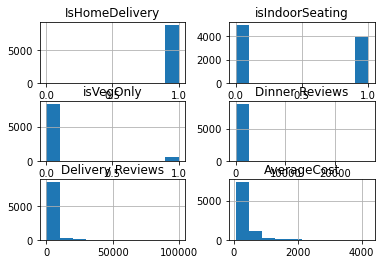

In [15]:
dataset.hist()

In [16]:
dataset[['Area0', 'Area1', 'Area2']] = dataset['Area'].str.split(',', expand=True)
dataset.tail()
dataset['Area0'].value_counts() 
dataset.drop(['Area1','Area2'],axis=1, inplace=True)
area = dataset.Area0.value_counts()
 

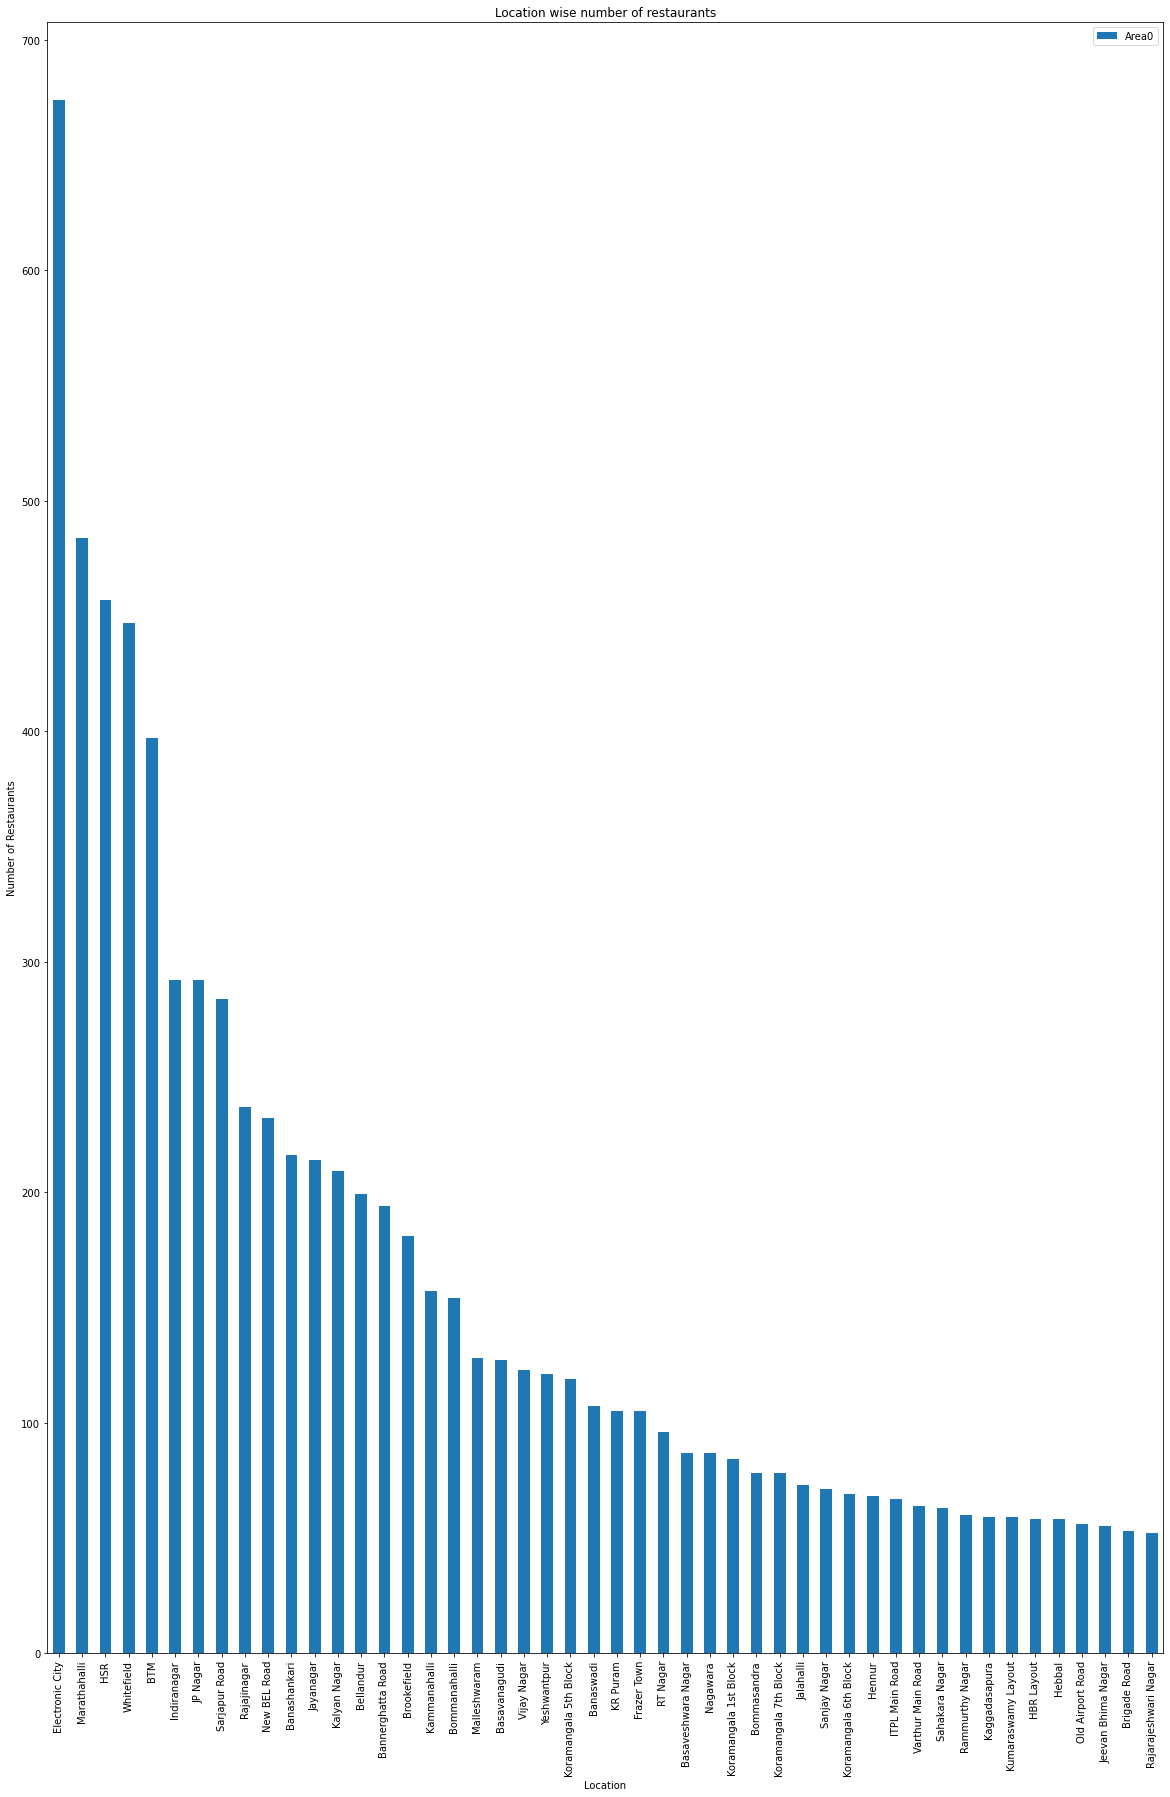

In [17]:
# number of restaurants in every location
plt.figure(figsize = (20,30))
area[area>= 50].plot(kind ='bar') 
plt.xticks(rotation=90)
plt.title('Location wise number of restaurants')
plt.xlabel('Location')
plt.ylabel('Number of Restaurants')
plt.legend()

C:\Users\sandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


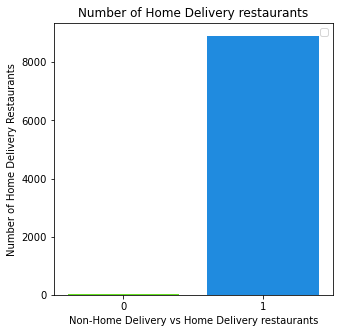

In [17]:
# Number of online and offline orders
plt.figure(figsize = (5,5))
sns.countplot(dataset['IsHomeDelivery'], palette = 'gist_rainbow')
plt.title('Number of Home Delivery restaurants')
plt.xlabel('Non-Home Delivery vs Home Delivery restaurants')
plt.ylabel('Number of Home Delivery Restaurants')
plt.legend()

No handles with labels found to put in legend.


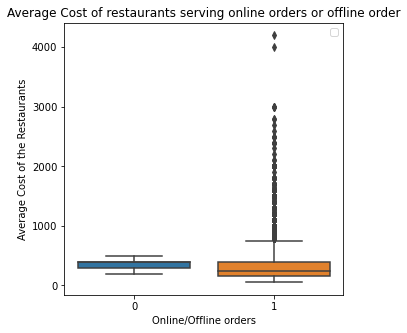

In [18]:
# Rating of restaurants serving online orders and offline order
plt.figure(figsize = (5,5))
sns.boxplot(x = 'IsHomeDelivery', y = 'AverageCost', data = dataset)
plt.title('Average Cost of restaurants serving online orders or offline order')
plt.xlabel('Online/Offline orders')
plt.ylabel('Average Cost of the Restaurants')
plt.legend()

No handles with labels found to put in legend.


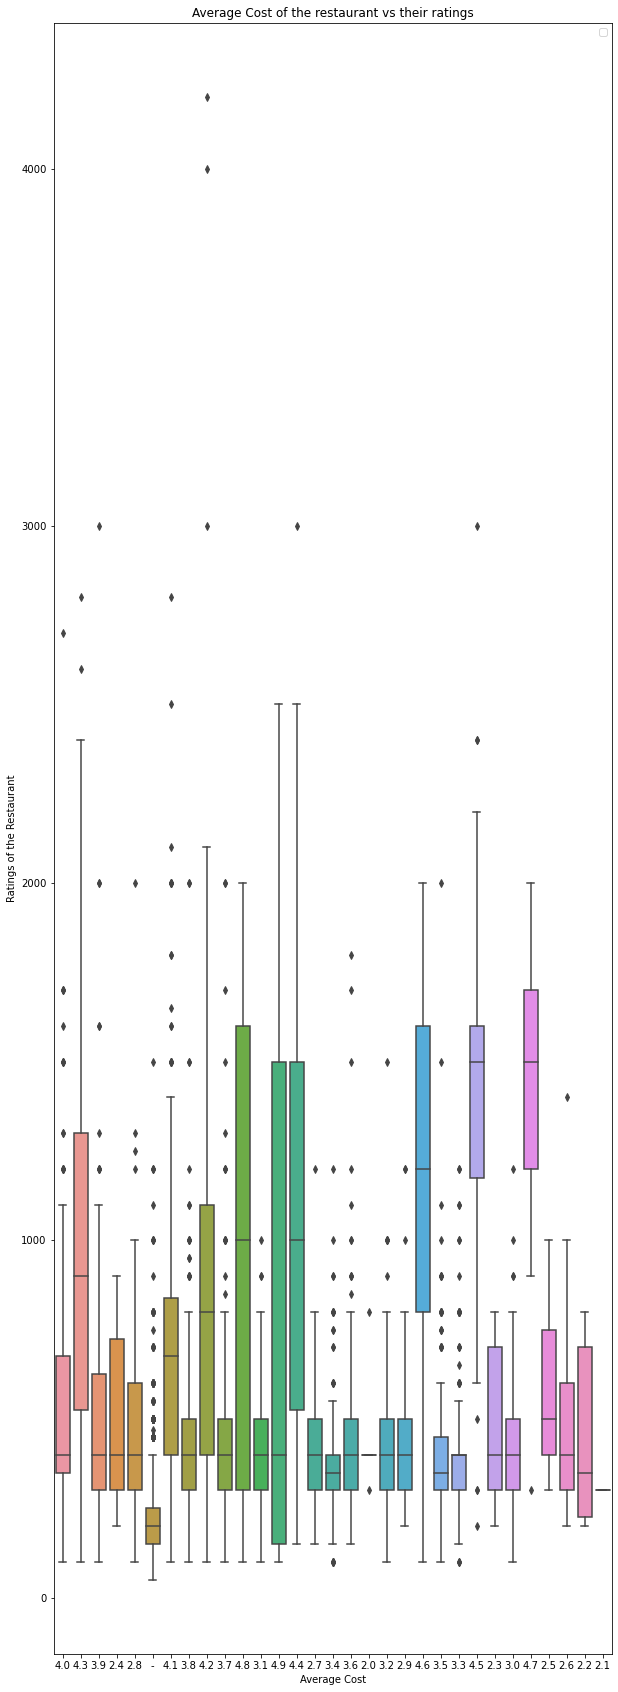

In [19]:
# figure out does costly restaurants also have higher ratings

plt.figure(figsize = (10,30))
sns.boxplot(x = 'Dinner Ratings', y = 'AverageCost', data = dataset)
plt.title('Average Cost of the restaurant vs their ratings')
plt.xlabel('Average Cost')
plt.ylabel('Ratings of the Restaurant')
plt.legend()

In [23]:
 # location wise online orders
df_loc_onlineord = pd.DataFrame(dataset.groupby(['Area0','IsHomeDelivery'])['Name'].count())
df_loc_onlineord = pd.pivot_table(df_loc_onlineord, index=['Area0'], columns=['IsHomeDelivery'])
df_loc_onlineord

Name       
IsHomeDelivery                          0      1
Area0                                           
1 MG Road Mall                        NaN    5.0
153 Biere Street                      NaN    1.0
5th Avenue                            NaN    1.0
Abhimaani Vasathi                     NaN    1.0
Aloft Bengaluru Cessna Business Park  NaN    1.0
...                                   ...    ...
Whitefield                            NaN  447.0
Wilson Garden                         1.0   17.0
Windmills Craftworks                  NaN    2.0
Yelahanka                             NaN   13.0
Yeshwantpur                           1.0  120.0

[168 rows x 2 columns]

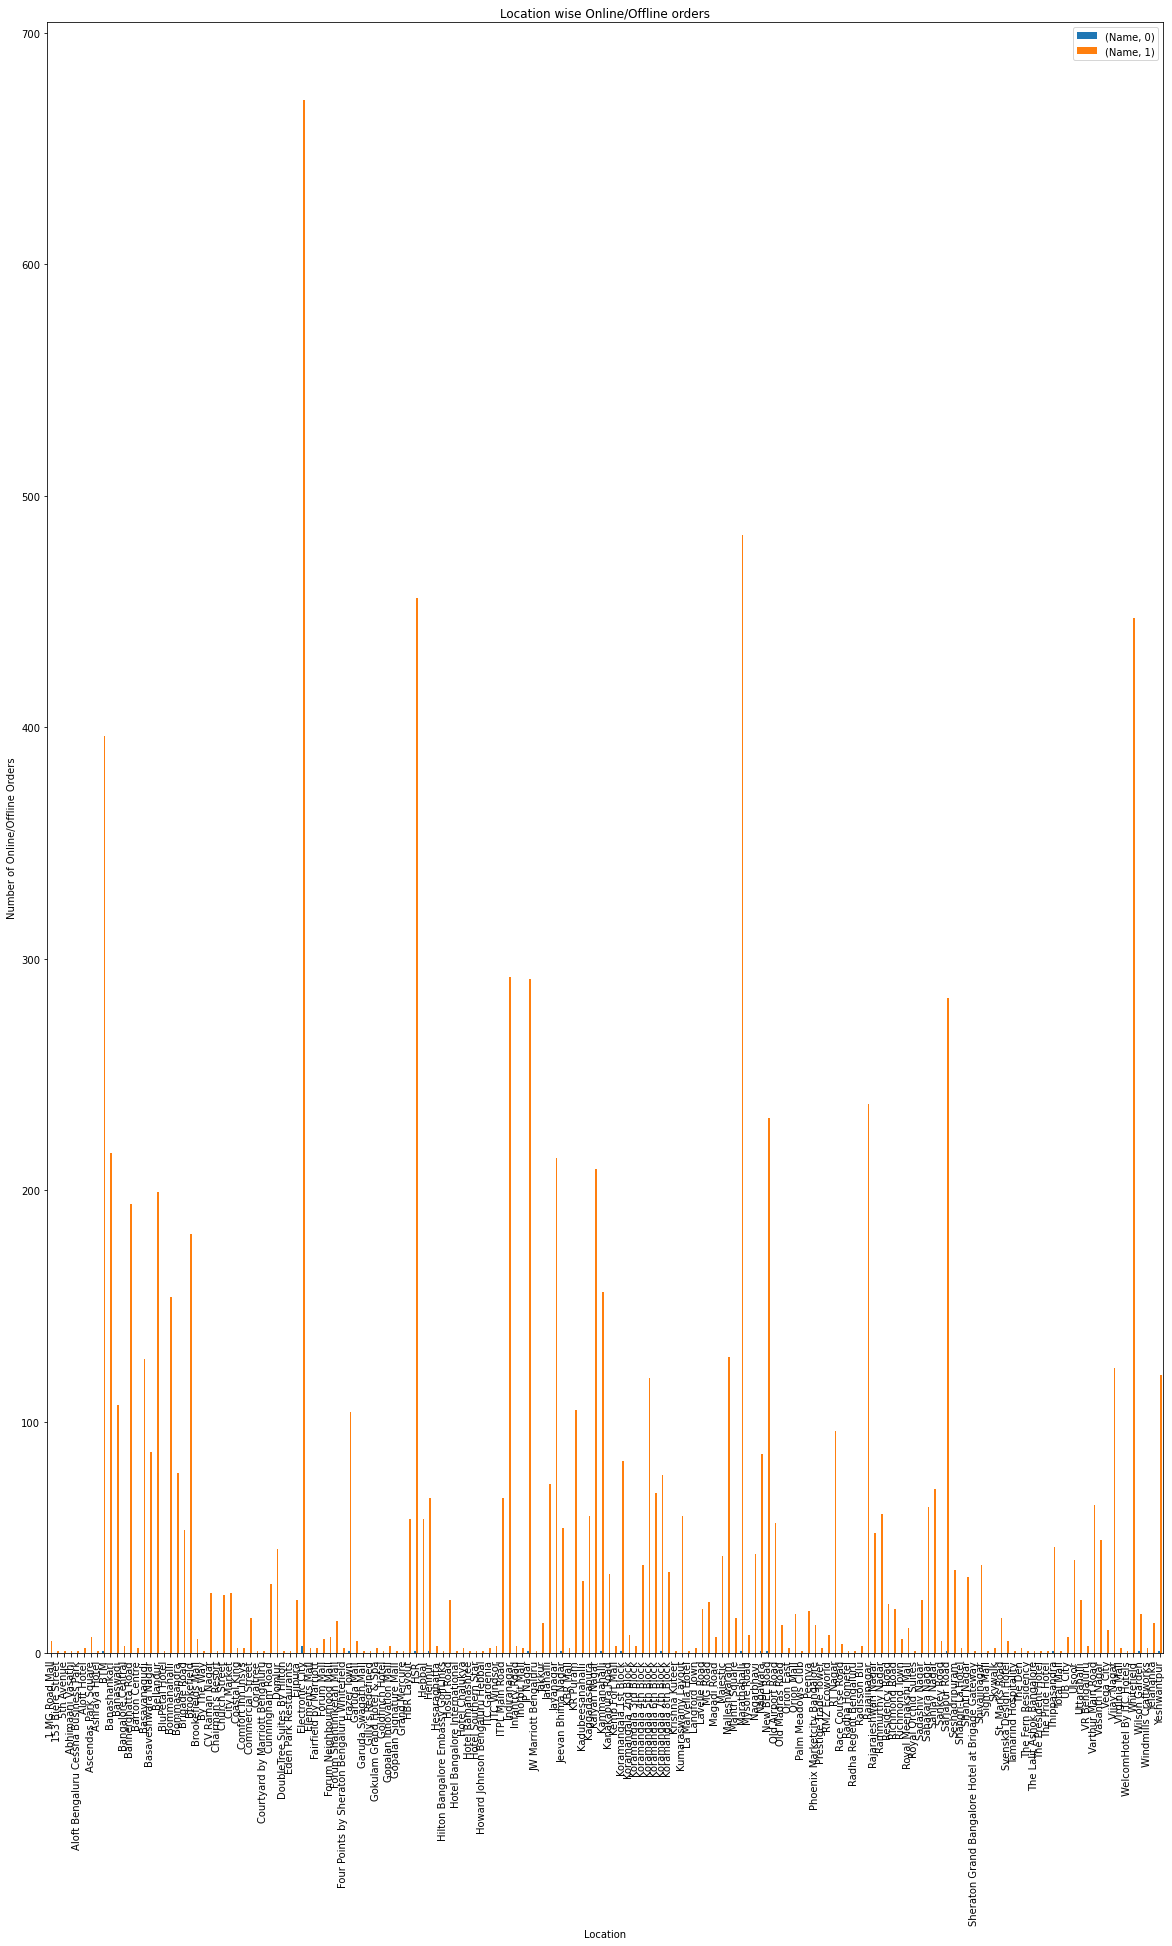

In [24]:
df_loc_onlineord.plot(kind = 'bar', figsize = (20,30))
plt.title('Location wise Online/Offline orders')
plt.xlabel('Location')
plt.ylabel('Number of Online/Offline Orders')
plt.legend()

In [23]:
# Most popular cuisines

df_cui_vot = dataset[['Cuisines', 'Dinner Reviews']]
df_cui_vot = df_cui_vot.groupby(['Cuisines'])['Dinner Reviews'].sum()
df_cui_vot = df_cui_vot.to_frame()
df_cui_vot = df_cui_vot.sort_values('Dinner Reviews', ascending=False)
df_cui_vot

,Dinner Reviews
Cuisines,
"Continental, Asian, Pizza, Burger, Biryani",40200
"BBQ, Mughlai, Biryani, North Indian, Desserts, Beverages",39260
"Pizza, Pasta, Fast Food, Desserts, Beverages, Sandwich, North Indian",33589
"North Indian, Mangalorean, BBQ, Street Food, Desserts, Salad, Beverages",32180
"North Indian, Biryani, Kebab, Chinese, South Indian, Beverages",25848
...,...
"Healthy Food, Salad",0
"Healthy Food, North Indian, Thai, Desserts, Beverages",0
"Healthy Food, North Indian, Fast Food, Desserts",0


In [25]:
dataset['Cuisines']

0       South Indian, North Indian, Chinese, Street Fo...
1                  Biryani, Andhra, North Indian, Seafood
2                                                 Biryani
3                              Pizza, Fast Food, Desserts
4         Burger, Fast Food, Biryani, Desserts, Beverages
                              ...                        
8918                                            Fast Food
8919                      Seafood, Mangalorean, Beverages
8920                                       Salad, Chinese
8921                                        Thai, Chinese
8922                                   Biryani, Fast Food
Name: Cuisines, Length: 8923, dtype: object

In [26]:
df_cui_vot_top = df_cui_vot.head(15)
plt.figure(figsize = (10,12))
sns.barplot(df_cui_vot_top.index , df_cui_vot_top['Dinner Reviews'])
plt.xticks(rotation = 90)
plt.title('Most popular Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of reviews')
plt.legend()

NameError: name 'df_cui_vot' is not defined

In [27]:
# segregrating cuisine column
cuisines={}
zipped=zip(dataset['Cuisines'], dataset['Dinner Reviews'])

for cuisine, dinrev in zipped:
    current_cuisines = cuisine.split(',')
    total_current_cuisines = len(current_cuisines)
for cuisi in current_cuisines:
    cuisines[cuisi] = cuisines.get(cuisi,0) + (dinrev//total_current_cuisines)

totalSum=0
for key in cuisines:
    totalSum+= cuisines[key]
print(dataset['Dinner Reviews'].sum())
print(totalSum)

cuisines_list=list(cuisines.keys())
corresponding_dinrevs=list(cuisines.values())
cuisines_={}
cuisines_ = {'Cuisines': cuisines_list,
            'Dinner Reviews':corresponding_dinrevs}

cuisines_dinrevs=pd.DataFrame.from_dict(cuisines_)
cuisines_dinrevs

1401857
6


,Cuisines,Dinner Reviews
0,Biryani,3
1,Fast Food,3


In [27]:
cuisines={}
zipped=zip(dataset['Cuisines'], dataset['Dinner Reviews'])

for cuisine, dinrev in zipped:
    current_cuisines = cuisine.split(',')
    total_current_cuisines = len(current_cuisines)
    print(total_current_cuisines)
    totalSum=0
for key in cuisines:
    totalSum += cuisines[key]
print(dataset['Dinner Reviews'].sum())
print(totalSum)

8
4
1
3
5
1
4
4
2
1
3
3
2
2
3
6
3
2
2
8
6
3
5
4
6
7
6
8
8
6
8
7
4
7
3
5
5
3
2
4
3
8
3
5
4
6
8
3
2
4
8
1
7
4
8
3
5
6
8
6
4
1
2
3
3
2
2
6
5
4
1
7
2
1
2
4
4
5
4
6
2
2
4
5
7
7
8
2
2
3
8
2
7
5
4
2
5
6
4
2
3
4
2
5
4
2
2
2
3
2
5
4
2
3
6
2
4
3
2
5
2
6
1
3
2
4
3
7
7
5
4
2
4
2
4
1
3
3
2
8
4
6
1
4
6
7
2
6
2
6
4
2
2
6
3
2
4
2
4
8
7
3
3
3
8
3
1
2
2
3
3
8
3
2
3
6
4
4
4
6
3
2
1
3
4
1
3
2
5
4
4
2
2
4
2
4
2
3
7
1
1
4
1
2
3
2
4
2
2
2
6
2
3
5
3
4
3
3
4
6
4
4
2
4
3
2
2
3
7
5
4
4
3
3
1
1
1
3
2
2
3
2
1
2
3
3
7
3
5
7
2
6
1
2
2
5
2
2
1
3
3
6
6
1
2
3
4
2
2
2
8
3
1
3
1
6
3
7
4
2
2
3
8
4
5
2
2
2
3
1
3
6
1
3
3
4
6
4
2
5
6
3
4
6
6
3
3
6
4
2
2
5
4
5
5
2
4
3
7
4
2
5
3
4
3
6
3
5
3
3
1
3
2
7
3
6
4
3
2
2
4
4
2
1
1
8
3
6
4
3
2
3
2
3
2
4
1
2
4
5
2
3
3
5
4
5
6
2
1
2
2
3
3
3
1
1
2
2
7
2
5
1
2
2
3
2
1
5
1
2
3
2
5
7
1
4
6
6
2
4
3
2
2
3
2
7
1
8
5
2
6
2
5
7
7
3
2
4
1
4
4
1
2
2
4
5
2
1
3
3
7
3
1
3
4
2
1
4
2
1
4
4
5
4
1
3
1
2
2
4
1
2
4
1
4
3
7
5
2
3
3
8
1
4
8
4
4
1
1
5
7
2
2
3
6
3
5
4
7
3
2
4
4
2
1
5
2
4
3
4
2
1
2
3
2
4
6
3
2
2


2
3
1
1
5
2
6
8
1
2
8
3
2
3
6
1
6
1
5
5
3
3
3
7
1
2
1
4
6
7
8
2
3
8
6
2
2
2
5
1
1
2
2
2
2
4
1
5
1
3
1
4
3
1
1
2
3
1
2
1
2
1
3
1
2
1
3
1
2
1
2
2
6
4
4
5
3
3
4
2
2
3
2
4
8
7
7
6
3
8
4
4
6
4
5
7
3
2
5
8
3
3
5
3
4
6
6
3
2
1
4
4
8
1
7
4
8
3
2
6
4
2
2
2
6
4
2
4
2
8
3
1
6
2
2
6
4
1
4
5
2
2
3
2
1
5
2
2
3
5
2
3
2
5
2
4
8
3
5
4
6
5
1
5
7
4
8
5
1
5
2
3
4
4
3
3
4
5
4
7
8
2
4
1
1
3
2
7
4
7
6
6
7
6
3
4
4
3
5
1
6
3
3
4
1
6
2
4
2
8
4
8
3
3
1
8
2
1
6
3
3
3
4
5
2
4
4
1
8
5
4
5
8
3
4
4
3
4
8
2
1
1
2
3
1
4
6
3
3
5
2
2
2
3
2
2
1
5
2
4
2
4
8
5
4
7
5
1
3
5
4
2
1
6
4
5
3
6
1
2
2
3
5
1
1
3
3
3
7
5
3
3
1
2
2
5
4
1
5
3
2
3
7
4
2
4
8
4
3
6
1
4
4
2
5
6
3
5
5
4
2
3
1
4
5
5
5
8
3
1
8
1
2
3
2
2
3
5
2
6
2
1
7
3
5
7
5
3
3
3
2
3
1
2
3
4
6
3
3
5
1
4
2
4
1
2
4
2
8
5
4
2
2
4
4
3
2
2
4
1
4
4
8
4
3
5
8
1
2
2
1
2
2
1
3
1
2
8
2
1
5
3
4
6
6
1
2
7
2
2
1
2
3
2
5
7
6
2
4
4
2
3
1
7
2
2
4
2
3
4
3
5
4
2
5
4
4
3
8
4
8
3
3
1
7
4
1
5
2
4
3
6
4
7
5
6
1
3
4
6
2
4
4
8
6
3
2
2
1
3
3
4
7
3
1
1
3
3
2
3
6
7
2
5
3
4
4
3
2
2
2
5
2
5
5
5
6
7
2
6


In [28]:
#APPLYING KNN
dataset.insert(1, 'rest_id', range(1, 1 + len(dataset)))
dataset

,Name,rest_id,URL,Cuisines,Area,IsHomeDelivery,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,AverageCost,Area0
0,Sri Udupi Park,1,https://www.zomato.com/bangalore/sri-udupi-par...,"South Indian, North Indian, Chinese, Street Fo...","Indiranagar, Bangalore",1,1,1,4.0,462,4.1,16000,450,Indiranagar
1,Meghana Foods,2,https://www.zomato.com/bangalore/meghana-foods...,"Biryani, Andhra, North Indian, Seafood","Indiranagar, Bangalore",1,1,0,4.3,1654,4.3,28600,700,Indiranagar
2,Donne Biriyani House,3,https://www.zomato.com/bangalore/donne-biriyan...,Biryani,"Indiranagar, Bangalore",1,1,0,3.9,411,3.5,33200,300,Indiranagar
3,Domino's Pizza,4,https://www.zomato.com/bangalore/dominos-pizza...,"Pizza, Fast Food, Desserts","Indiranagar, Bangalore",1,1,0,2.4,422,4.4,8205,400,Indiranagar
4,KFC,5,https://www.zomato.com/bangalore/kfc-indiranagar,"Burger, Fast Food, Biryani, Desserts, Beverages","Indiranagar, Bangalore",1,1,0,2.8,673,4.0,9148,400,Indiranagar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8918,New SBFC Food Funda,8919,https://www.zomato.com/bangalore/new-sbfc-food...,Fast Food,"Frazer Town, Bangalore",1,1,0,3.7,14,4.0,48,300,Frazer Town
8919,Kudla - Coraltree,8920,https://www.zomato.com/bangalore/kudla-coraltr...,"Seafood, Mangalorean, Beverages","Coraltree, RT Nagar, Bangalore",1,0,0,3.9,348,4.3,564,1200,Coraltree
8920,Bangkok Bowl,8921,https://www.zomato.com/bangalore/bangkok-bowl-...,"Salad, Chinese","Kammanahalli, Bangalore",1,0,0,-,0,3.7,254,300,Kammanahalli
8921,Yuan Restaurant,8922,https://www.zomato.com/bangalore/yuan-restaura...,"Thai, Chinese","HBR Layout, Bangalore",1,1,0,3.8,188,3.5,3169,400,HBR Layout


In [29]:
dataset.isnull().sum()

Name                0
rest_id             0
URL                 0
Cuisines            0
Area                0
IsHomeDelivery      0
isIndoorSeating     0
isVegOnly           0
Dinner Ratings      0
Dinner Reviews      0
Delivery Ratings    0
Delivery Reviews    0
AverageCost         0
Area0               0
dtype: int64

In [29]:
#lable encoding ratings column

lab_enc = preprocessing.LabelEncoder()
Y = dataset['Dinner Ratings']
dataset_transformed = dataset

Y_encoded = lab_enc.fit_transform(Y)
Y_encoded = pd.DataFrame({'rating_encoded':Y_encoded})
#rest_data_transformed['rating_encoded'] = pd.cut(x=rest_data['rate'], bins=31, labels=np.arange(31), right=False)
#rest_data_transformed = rest_data_transformed.drop(['rate'], axis = 
dataset_transformed = pd.concat([dataset_transformed, Y_encoded], axis=1)
dataset_transformed

,Name,rest_id,URL,Cuisines,Area,IsHomeDelivery,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,AverageCost,Area0,rating_encoded
0,Sri Udupi Park,1,https://www.zomato.com/bangalore/sri-udupi-par...,"South Indian, North Indian, Chinese, Street Fo...","Indiranagar, Bangalore",1,1,1,4.0,462,4.1,16000,450,Indiranagar,21
1,Meghana Foods,2,https://www.zomato.com/bangalore/meghana-foods...,"Biryani, Andhra, North Indian, Seafood","Indiranagar, Bangalore",1,1,0,4.3,1654,4.3,28600,700,Indiranagar,24
2,Donne Biriyani House,3,https://www.zomato.com/bangalore/donne-biriyan...,Biryani,"Indiranagar, Bangalore",1,1,0,3.9,411,3.5,33200,300,Indiranagar,20
3,Domino's Pizza,4,https://www.zomato.com/bangalore/dominos-pizza...,"Pizza, Fast Food, Desserts","Indiranagar, Bangalore",1,1,0,2.4,422,4.4,8205,400,Indiranagar,5
4,KFC,5,https://www.zomato.com/bangalore/kfc-indiranagar,"Burger, Fast Food, Biryani, Desserts, Beverages","Indiranagar, Bangalore",1,1,0,2.8,673,4.0,9148,400,Indiranagar,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8918,New SBFC Food Funda,8919,https://www.zomato.com/bangalore/new-sbfc-food...,Fast Food,"Frazer Town, Bangalore",1,1,0,3.7,14,4.0,48,300,Frazer Town,18
8919,Kudla - Coraltree,8920,https://www.zomato.com/bangalore/kudla-coraltr...,"Seafood, Mangalorean, Beverages","Coraltree, RT Nagar, Bangalore",1,0,0,3.9,348,4.3,564,1200,Coraltree,20
8920,Bangkok Bowl,8921,https://www.zomato.com/bangalore/bangkok-bowl-...,"Salad, Chinese","Kammanahalli, Bangalore",1,0,0,-,0,3.7,254,300,Kammanahalli,0
8921,Yuan Restaurant,8922,https://www.zomato.com/bangalore/yuan-restaura...,"Thai, Chinese","HBR Layout, Bangalore",1,1,0,3.8,188,3.5,3169,400,HBR Layout,19


In [31]:
dataset_transformed.dropna(inplace = True)  # dropping null values
dataset_transformed.isnull().sum()

Name                0
rest_id             0
URL                 0
Cuisines            0
Area                0
IsHomeDelivery      0
isIndoorSeating     0
isVegOnly           0
Dinner Ratings      0
Dinner Reviews      0
Delivery Ratings    0
Delivery Reviews    0
AverageCost         0
Area0               0
rating_encoded      0
dtype: int64

In [32]:
dataset_transformed['Dinner Ratings'].unique()


array(['4.0', '4.3', '3.9', '2.4', '2.8', '-', '4.1', '3.8', '4.2', '3.7',
       '4.8', '3.1', '4.9', '4.4', '2.7', '3.4', '3.6', '2.0', '3.2',
       '2.9', '4.6', '3.5', '3.3', '4.5', '2.3', '3.0', '4.7', '2.5',
       '2.6', '2.2', '2.1'], dtype=object)

In [33]:
len(dataset['Dinner Ratings'].unique())

31

In [34]:
#MODEL TRAINING

In [35]:
#1) recommend_rating:
#This function implements knn and recommends restaurants based on rating of the input retaurant

def recommend_rating(inp_rest_id, num_of_reccomendation):
    X = dataset_transformed[['rest_id']]
    Y = dataset_transformed['rating_encoded']
    #Y_encoded = lab_enc.fit_transform(Y)

    knc = NearestNeighbors(metric = 'cosine', n_neighbors=num_of_reccomendation, algorithm='brute', n_jobs=-1)
    knc.fit(X,Y)
    neighbor_distances, knc_neigbors = knc.kneighbors([[inp_rest_id]])
    knc_neigbors = knc_neigbors[0]
    print("\n",num_of_reccomendation,"neighbors: ", knc_neigbors)
    print("\nDistance of neighbors: ", neighbor_distances[0], "\n")
  
    recommended_rest = pd.DataFrame()
    for item in knc_neigbors:
        rest_entry = dataset_transformed.loc[dataset_transformed['rest_id'] == item]
        recommended_rest=recommended_rest.append( [rest_entry] )
        recommended_rest = recommended_rest.sort_values('Dinner Ratings', ascending=False)

    return recommended_rest

In [36]:
#2) recommend_online:
#This function implements knn and recommends restaurants which have online deivery option available based on rating of the input retaurant 

def recommend_online(inp_rest_id, num_of_reccomendation):
    rest_online = dataset_transformed[(dataset_transformed['IsHomeDelivery'] == 1)]
    X = rest_online[['rest_id']]
    Y = rest_online['rating_encoded']
  #Y_encoded = lab_enc.fit_transform(Y)

    knc = KNeighborsClassifier(metric = 'cosine', n_neighbors=num_of_reccomendation, algorithm='brute', n_jobs=-1)
    knc.fit(X,Y)
    neighbor_distances, knc_neigbors = knc.kneighbors([[inp_rest_id]])
    knc_neigbors = knc_neigbors[0]
    print("\n",num_of_reccomendation,"neighbors: ", knc_neigbors)
    print("\nDistance of neighbors: ", neighbor_distances[0], "\n")
  
    recommended_rest = pd.DataFrame()
    for item in knc_neigbors:
        rest_entry = rest_online.loc[rest_online['rest_id'] == item]
        recommended_rest=recommended_rest.append( [rest_entry] )
        recommended_rest = recommended_rest.sort_values('Dinner Ratings', ascending=False)

    return recommended_rest

In [37]:
#3) recommend_according_to_budget:
#This function implements knn and recommends restaurants based on rating of the input retaurant and filters out the restaurants that are outisde the budegt provided by the user

def recommend_according_to_budget(inp_rest_id, num_of_reccomendation, upper_limit):
    rest_budget = dataset_transformed[(dataset_transformed['AverageCost'] <= upper_limit)]
    X = rest_budget[['rest_id']]
    Y = rest_budget['rating_encoded']
    #Y_encoded = lab_enc.fit_transform(Y)

    knc = KNeighborsClassifier(metric = 'cosine', n_neighbors=num_of_reccomendation, algorithm='brute', n_jobs=-1)
    knc.fit(X,Y)
    neighbor_distances, knc_neigbors = knc.kneighbors([[inp_rest_id]])
    knc_neigbors = knc_neigbors[0]
    print("\n",num_of_reccomendation,"neighbors: ", knc_neigbors)
    print("\nDistance of neighbors: ", neighbor_distances[0], "\n")

    recommended_rest = pd.DataFrame()
    for item in knc_neigbors:
        rest_entry = rest_budget.loc[rest_budget['rest_id'] == item]
        recommended_rest=recommended_rest.append( [rest_entry] )
        recommended_rest = recommended_rest.sort_values('Dinner Ratings', ascending=False)


    return recommended_rest

In [38]:
#4) recommend_according_to_budget_and_online:
#This function implements knn and recommends restaurants which have online deivery option available based on rating of the input retaurant and 
#filters out the restaurants that are outisde the budegt provided by the user

def recommend_according_to_budget_and_online(inp_rest_id, num_of_reccomendation, upper_limit):
    rest_online = dataset_transformed[(dataset_transformed['IsHomeDelivery'] == 1)]
    rest_budget = rest_online[(rest_online['AverageCost'] <= upper_limit)]
    X = rest_budget[['rest_id']]
    Y = rest_budget['rating_encoded']

  # euclidean , cosine
    knc = NearestNeighbors(metric = 'cosine', n_neighbors=num_of_reccomendation, n_jobs=-1)
    knc.fit(X,Y)
    neighbor_distances, knc_neigbors = knc.kneighbors([[inp_rest_id]], n_neighbors=num_of_reccomendation)
    knc_neigbors = knc_neigbors[0]
    print("\n",num_of_reccomendation,"neighbors: ", knc_neigbors)
    print("\nDistance of neighbors: ", neighbor_distances[0], "\n")

    recommended_rest = pd.DataFrame()
    for item in knc_neigbors:
        rest_entry = rest_budget.loc[rest_budget['rest_id'] == item]
        recommended_rest=recommended_rest.append( [rest_entry] )
        recommended_rest = recommended_rest.sort_values('Dinner Ratings', ascending=False)

    return recommended_rest

In [39]:
#5)Taking input from the user

inp_rest_id = int(input("Enter the restaurant ID: "))
num_of_reccomendation = int(input("\nEnter number of recommendations you want for the restaurants: "))
online_available = int(input("\nShould the restaurant have Online order facility: \n1.Yes \n2.No\nEnter your response: "))
budget = int(input("\nFilter according to budget?: \n1.Yes \n2.Skip\nEnter your response: "))
if budget == 1:
    upper_limit = float(input("Enter the budget. Upper limit: "))

inp_rest = dataset_transformed[(dataset_transformed['rest_id'] == inp_rest_id)]
print("\nDetails of input restaurant: \n", inp_rest[['Name', 'rest_id', 'Dinner Ratings', 'rating_encoded', 'Area']])

if (online_available == 1) & (budget == 1):
    recommended_rest = recommend_according_to_budget_and_online(inp_rest_id, num_of_reccomendation, upper_limit)
elif (online_available != 1) & (budget == 1):
    recommended_rest = recommend_according_to_budget(inp_rest_id, num_of_reccomendation, upper_limit)
elif (online_available == 1) & (budget != 1):
    recommended_rest = recommend_online(inp_rest_id, num_of_reccomendation)
elif (online_available != 1) & (budget != 1):
    recommended_rest = recommend_rating(inp_rest_id, num_of_reccomendation)

recommended_rest[['Name', 'rest_id', 'Dinner Ratings', 'rating_encoded', 'Area', 'Cuisines', 'AverageCost']]

KeyboardInterrupt: Interrupted by user

### Applying Decision Tree Regression

In [30]:
dataset.head()

,Name,rest_id,URL,Cuisines,Area,IsHomeDelivery,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,AverageCost,Area0
0,Sri Udupi Park,1,https://www.zomato.com/bangalore/sri-udupi-par...,"South Indian, North Indian, Chinese, Street Fo...","Indiranagar, Bangalore",1,1,1,4.0,462,4.1,16000,450,Indiranagar
1,Meghana Foods,2,https://www.zomato.com/bangalore/meghana-foods...,"Biryani, Andhra, North Indian, Seafood","Indiranagar, Bangalore",1,1,0,4.3,1654,4.3,28600,700,Indiranagar
2,Donne Biriyani House,3,https://www.zomato.com/bangalore/donne-biriyan...,Biryani,"Indiranagar, Bangalore",1,1,0,3.9,411,3.5,33200,300,Indiranagar
3,Domino's Pizza,4,https://www.zomato.com/bangalore/dominos-pizza...,"Pizza, Fast Food, Desserts","Indiranagar, Bangalore",1,1,0,2.4,422,4.4,8205,400,Indiranagar
4,KFC,5,https://www.zomato.com/bangalore/kfc-indiranagar,"Burger, Fast Food, Biryani, Desserts, Beverages","Indiranagar, Bangalore",1,1,0,2.8,673,4.0,9148,400,Indiranagar


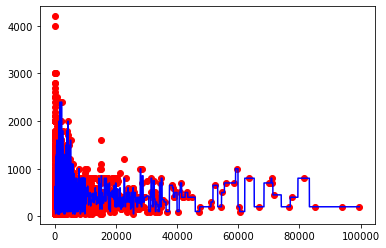

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:,11:12].values
y = dataset.iloc[:,12].values
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X,y)
y_pred = regressor.predict([[6.5]])
X_grid = np.arange(min(X), max(X), 0.001)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = "red")
plt.plot(X_grid ,regressor.predict(X_grid), color = "blue")
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.show()

In [41]:
y_pred

array([238.95348837])

In [42]:
accuracy = regressor.score(X,y)
print('Accuracy of the model is',accuracy*100,'%')


Accuracy of the model is 33.784467878270284 %


### Applying Support Vector Machines

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#dataset = pd.read_csv("Social_Network_Ads.csv")

X = dataset.iloc[:,[5,11]].values
y = dataset.iloc[:,12].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Taking Linear Kernel


In [120]:
#Create your Classifier here
from sklearn.svm import SVC
classifier = SVC(kernel="linear", random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [121]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,   0,   0,   0,   0,   0,  10,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,  18,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,  71,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,  40,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0, 153,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,  58,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0, 16

IndexError: list index out of range

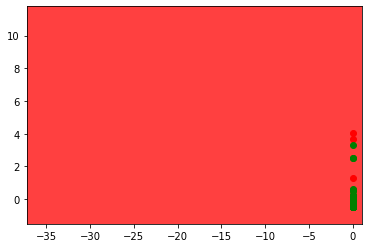

In [122]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j)
plt.title('SVM Classification (Training set)')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j)
plt.title('SVM Classification (Test set)')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

In [123]:
accuracy = classifier.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

Accuracy of the model is 18.285714285714285 %


## Taking RBF Kernel

In [124]:
from sklearn.svm import SVC
classifier = SVC(kernel = "rbf", random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,   0,   0,   0,   0,   0,  10,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,  18,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,  71,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,  40,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0, 153,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,  58,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0, 16

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j)
plt.title('SVM Classification (Training set)')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j)
plt.title('SVM Classification (Test set)')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

In [ ]:
accuracy = classifier.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

# Applying Multiple Linear Regression

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [43]:
dataset


,Name,rest_id,URL,Cuisines,Area,IsHomeDelivery,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,AverageCost,Area0
0,Sri Udupi Park,1,https://www.zomato.com/bangalore/sri-udupi-par...,"South Indian, North Indian, Chinese, Street Fo...","Indiranagar, Bangalore",1,1,1,4.0,462,4.1,16000,450,Indiranagar
1,Meghana Foods,2,https://www.zomato.com/bangalore/meghana-foods...,"Biryani, Andhra, North Indian, Seafood","Indiranagar, Bangalore",1,1,0,4.3,1654,4.3,28600,700,Indiranagar
2,Donne Biriyani House,3,https://www.zomato.com/bangalore/donne-biriyan...,Biryani,"Indiranagar, Bangalore",1,1,0,3.9,411,3.5,33200,300,Indiranagar
3,Domino's Pizza,4,https://www.zomato.com/bangalore/dominos-pizza...,"Pizza, Fast Food, Desserts","Indiranagar, Bangalore",1,1,0,2.4,422,4.4,8205,400,Indiranagar
4,KFC,5,https://www.zomato.com/bangalore/kfc-indiranagar,"Burger, Fast Food, Biryani, Desserts, Beverages","Indiranagar, Bangalore",1,1,0,2.8,673,4.0,9148,400,Indiranagar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8918,New SBFC Food Funda,8919,https://www.zomato.com/bangalore/new-sbfc-food...,Fast Food,"Frazer Town, Bangalore",1,1,0,3.7,14,4.0,48,300,Frazer Town
8919,Kudla - Coraltree,8920,https://www.zomato.com/bangalore/kudla-coraltr...,"Seafood, Mangalorean, Beverages","Coraltree, RT Nagar, Bangalore",1,0,0,3.9,348,4.3,564,1200,Coraltree
8920,Bangkok Bowl,8921,https://www.zomato.com/bangalore/bangkok-bowl-...,"Salad, Chinese","Kammanahalli, Bangalore",1,0,0,-,0,3.7,254,300,Kammanahalli
8921,Yuan Restaurant,8922,https://www.zomato.com/bangalore/yuan-restaura...,"Thai, Chinese","HBR Layout, Bangalore",1,1,0,3.8,188,3.5,3169,400,HBR Layout


In [75]:
dataset.dtypes


Name                 object
rest_id               int64
URL                  object
Cuisines             object
Area                 object
IsHomeDelivery        int64
isIndoorSeating       int64
isVegOnly             int64
Dinner Ratings      float64
Dinner Reviews        int64
Delivery Ratings    float64
Delivery Reviews      int64
AverageCost           int64
Area0                object
dtype: object

In [83]:
dataset.dropna()

,Name,rest_id,URL,Cuisines,Area,IsHomeDelivery,isIndoorSeating,isVegOnly,Dinner Ratings,Dinner Reviews,Delivery Ratings,Delivery Reviews,AverageCost,Area0
0,Sri Udupi Park,1,https://www.zomato.com/bangalore/sri-udupi-par...,"South Indian, North Indian, Chinese, Street Fo...","Indiranagar, Bangalore",1,1,1,4.0,462,4.1,16000,450,Indiranagar
1,Meghana Foods,2,https://www.zomato.com/bangalore/meghana-foods...,"Biryani, Andhra, North Indian, Seafood","Indiranagar, Bangalore",1,1,0,4.3,1654,4.3,28600,700,Indiranagar
2,Donne Biriyani House,3,https://www.zomato.com/bangalore/donne-biriyan...,Biryani,"Indiranagar, Bangalore",1,1,0,3.9,411,3.5,33200,300,Indiranagar
3,Domino's Pizza,4,https://www.zomato.com/bangalore/dominos-pizza...,"Pizza, Fast Food, Desserts","Indiranagar, Bangalore",1,1,0,2.4,422,4.4,8205,400,Indiranagar
4,KFC,5,https://www.zomato.com/bangalore/kfc-indiranagar,"Burger, Fast Food, Biryani, Desserts, Beverages","Indiranagar, Bangalore",1,1,0,2.8,673,4.0,9148,400,Indiranagar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8915,Ocea Hotel,8916,https://www.zomato.com/bangalore/ocea-hotel-br...,"North Indian, Chinese, Seafood, Biryani, Bever...","Brigade Road, Bangalore",1,1,0,2.8,291,3.8,2807,800,Brigade Road
8916,Lassi & Snacks Joint,8917,https://www.zomato.com/bangalore/lassi-snacks-...,"Beverages, Fast Food, Sandwich, Desserts, Burg...","Domlur, Bangalore",1,1,0,3.9,67,4.3,87,300,Domlur
8918,New SBFC Food Funda,8919,https://www.zomato.com/bangalore/new-sbfc-food...,Fast Food,"Frazer Town, Bangalore",1,1,0,3.7,14,4.0,48,300,Frazer Town
8919,Kudla - Coraltree,8920,https://www.zomato.com/bangalore/kudla-coraltr...,"Seafood, Mangalorean, Beverages","Coraltree, RT Nagar, Bangalore",1,0,0,3.9,348,4.3,564,1200,Coraltree


In [107]:
 
dataset['Delivery Ratings'] = pd.to_numeric(dataset['Delivery Ratings'], errors='coerce')
dataset['Dinner Ratings'] = pd.to_numeric(dataset['Dinner Ratings'], errors='coerce')
 

In [108]:
 # Replace infinite updated data with nan
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
dataset.dropna(inplace=True)

In [95]:
dataset['Delivery Ratings'] = dataset['Delivery Ratings'].astype(int)
dataset['Dinner Ratings'] = dataset['Dinner Ratings'].astype(int)

In [109]:
X = dataset.iloc[:,5:13].values
y = dataset.iloc[:,12].values

In [110]:
X, y 

(array([[    1,     1,     1, ...,     4, 16000,   450],
        [    1,     1,     0, ...,     4, 28600,   700],
        [    1,     1,     0, ...,     3, 33200,   300],
        ...,
        [    1,     1,     0, ...,     4,    48,   300],
        [    1,     0,     0, ...,     4,   564,  1200],
        [    1,     1,     0, ...,     3,  3169,   400]], dtype=int64),
 array([ 450,  700,  300, ...,  300, 1200,  400], dtype=int64))

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)


In [112]:
X_train, y_train

(array([[   1,    1,    1, ...,    4,  592, 1400],
        [   1,    1,    0, ...,    3,  403,  200],
        [   1,    1,    0, ...,    4, 3153,  200],
        ...,
        [   1,    1,    0, ...,    4, 3633,  350],
        [   1,    1,    0, ...,    4,  854,  250],
        [   1,    1,    0, ...,    3,  284, 1100]], dtype=int64),
 array([1400,  200,  200, ...,  350,  250, 1100], dtype=int64))

In [100]:
X_test, y_test

(array([[    1,     1,     0, ...,     4,  3123,  1100],
        [    1,     1,     0, ...,     4, 15200,   700],
        [    1,     1,     0, ...,     3,  2415,   700],
        ...,
        [    1,     0,     1, ...,     4,  4172,   200],
        [    1,     1,     0, ...,     3,   389,   300],
        [    1,     1,     0, ...,     4,    46,   750]], dtype=int64),
 array([1100,  700,  700,  800,  150,  500,  750,  800,  500,  500,  500,
         300,  650,  150,  400,  300,  300,  800,  350,  200,  400,  600,
         800,  700,  250,  700,  600,  350,  200,  700,  300,  400, 1000,
         400,  500,  700,  500,  350,  700,  400, 1600,  300,  300,  300,
         300,  250,  400,  400, 1600,  400,  800,  300,  300,  200,  400,
         300,  300,  400,  900,  500,  300,  300,  550,  400,  800,  250,
         800,  350,  800,  700,  800,  600,  300,  300,  400,  200,  400,
         400,  800,  800,  400,  300,  300, 1300,  200,  650,  500, 1000,
         500,  300,  500,  400,  400, 

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [115]:
y_pred = regressor.predict(X_test)

In [116]:
y_pred

array([1100.,  700.,  700.,  800.,  150.,  500.,  750.,  800.,  500.,
        500.,  500.,  300.,  650.,  150.,  400.,  300.,  300.,  800.,
        350.,  200.,  400.,  600.,  800.,  700.,  250.,  700.,  600.,
        350.,  200.,  700.,  300.,  400., 1000.,  400.,  500.,  700.,
        500.,  350.,  700.,  400., 1600.,  300.,  300.,  300.,  300.,
        250.,  400.,  400., 1600.,  400.,  800.,  300.,  300.,  200.,
        400.,  300.,  300.,  400.,  900.,  500.,  300.,  300.,  550.,
        400.,  800.,  250.,  800.,  350.,  800.,  700.,  800.,  600.,
        300.,  300.,  400.,  200.,  400.,  400.,  800.,  800.,  400.,
        300.,  300., 1300.,  200.,  650.,  500., 1000.,  500.,  300.,
        500.,  400.,  400.,  300.,  150.,  250.,  200.,  200.,  400.,
       1000., 1100.,  350.,  500.,  350.,  150.,  300.,  350., 1500.,
       1000., 1300., 1000.,  300.,  300.,  800.,  100.,  200.,  450.,
        400.,  300.,  200.,  300.,  400.,  250.,  600.,  200.,  400.,
        500.,  200.,

In [117]:
y_test

array([1100,  700,  700,  800,  150,  500,  750,  800,  500,  500,  500,
        300,  650,  150,  400,  300,  300,  800,  350,  200,  400,  600,
        800,  700,  250,  700,  600,  350,  200,  700,  300,  400, 1000,
        400,  500,  700,  500,  350,  700,  400, 1600,  300,  300,  300,
        300,  250,  400,  400, 1600,  400,  800,  300,  300,  200,  400,
        300,  300,  400,  900,  500,  300,  300,  550,  400,  800,  250,
        800,  350,  800,  700,  800,  600,  300,  300,  400,  200,  400,
        400,  800,  800,  400,  300,  300, 1300,  200,  650,  500, 1000,
        500,  300,  500,  400,  400,  300,  150,  250,  200,  200,  400,
       1000, 1100,  350,  500,  350,  150,  300,  350, 1500, 1000, 1300,
       1000,  300,  300,  800,  100,  200,  450,  400,  300,  200,  300,
        400,  250,  600,  200,  400,  500,  200,  750, 1500,  350,  900,
        800,  800,  800,  400, 2000,  300,  400,  600,  800,  500,  450,
        450,  500,  450,  350,  500,  250,  800,  2

In [118]:
accuracy = regressor.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')

Accuracy of the model is 100.0 %


## Applying Naiive Bayes

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#dataset = pd.read_csv("Social_Network_Ads.csv")

X = dataset.iloc[:,[8,10]].values
y = dataset.iloc[:,12].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Create your Classifier here
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j)
plt.title('Naive Bayes Classification (Training set)')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ['red', 'green'][i], label = j)
plt.title('Naive Bayes Classification (Test set)')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

In [ ]:
accuracy = classifier.score(X_test,y_test)
print('Accuracy of the model is',accuracy*100,'%')